In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os 

In [2]:
img_path='./bird_image_dataset/train/crow/American_Crow_0001_25053.jpg'

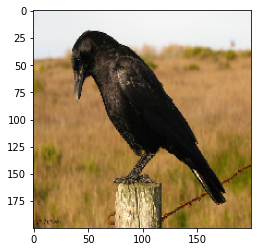

In [3]:
# img = image.load_img(img_path)
img = image.load_img(img_path, target_size=(200,200,3))
plt.imshow(img)

In [4]:
# X = image.img_to_array(img)
# X = np.expand_dims(X,axis=0)
# images = np.vstack([X])
# value = model.predict(images)
# plt.imshow(img)
# plt.show()
# if value==0:
#     print('crow')
# else:
#     print('sparrow')
# # print(model.predict(img))
# # grayImage = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)
# # cv2.imshow('hemlo', grayImage)
# # cv2.waitKey(0)

In [5]:
# cv2.imread(img_path).shape

In [6]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [7]:
train_dataset = train.flow_from_directory('./bird_image_dataset/train',
                                         target_size=(200,200),
                                         batch_size=5, 
                                         class_mode='binary')
val_dataset = validation.flow_from_directory('./bird_image_dataset/valid',
                                         target_size=(200,200),
                                         batch_size=5, 
                                         class_mode='binary')

Found 108 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [8]:
train_dataset.class_indices #neural network cannot take strings

{'crow': 0, 'sparrow': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   ##
                                   tf.keras.layers.Dense(1,activation='sigmoid')])

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
             metrics=['accuracy'])

In [ ]:
 model_fit = model.fit(train_dataset,
                      steps_per_epoch=5,
                      epochs=30,
                      validation_data=val_dataset)

<h1>Model backup pickle</h1>

In [ ]:
model.save('image_classification_model')

In [5]:
# filename = 'image_classification_model'
# pickle.dump(model, open(filename,'wb'))
# # open(filename)

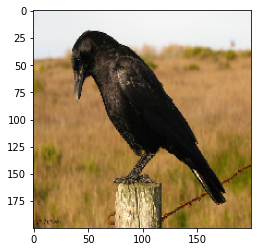

crow


In [10]:
# loaded_model = pickle.load(open(filename, 'rb'))
loaded_model = tf.keras.models.load_model('image_classification_model')
X = image.img_to_array(img)
X = np.expand_dims(X,axis=0)
images = np.vstack([X])
value = loaded_model.predict(images)
plt.imshow(img)
plt.show()
if value==0:
    print('crow')
else:
    print('sparrow')

<h1>##############################################################################</h1>


In [11]:
test_path = './bird_image_dataset/test'

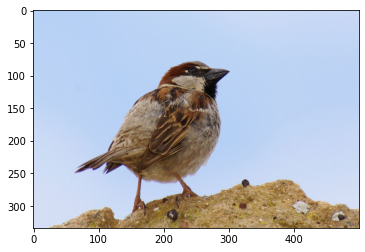

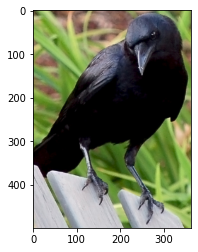

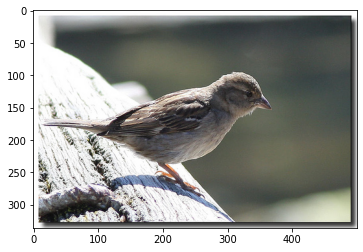

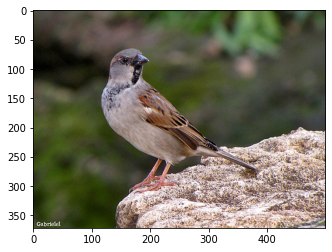

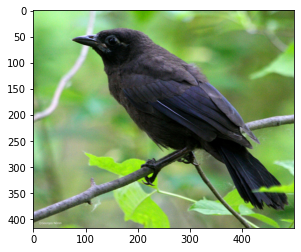

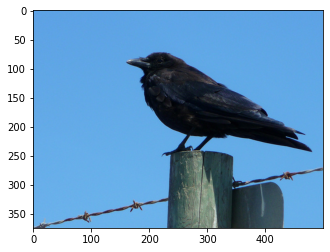

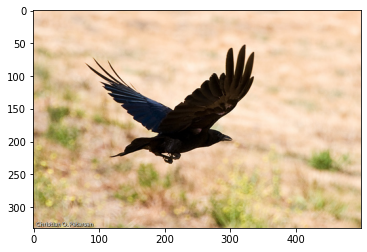

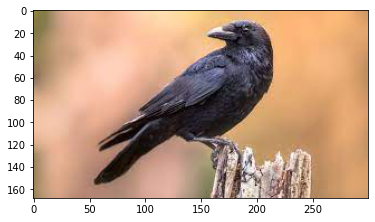

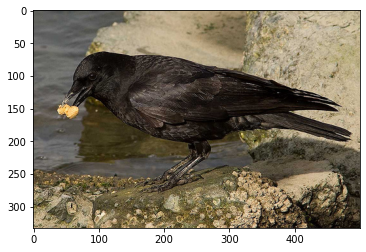

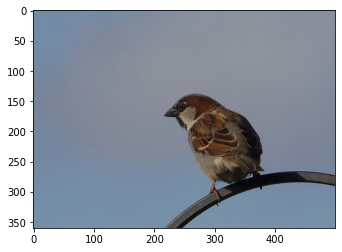

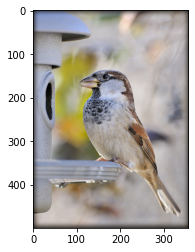

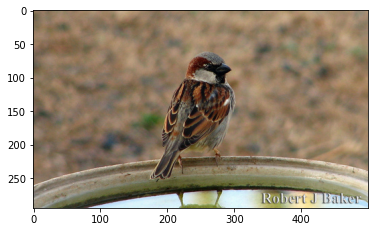

In [12]:
for i in os.listdir(test_path):
    img = image.load_img(test_path+'/'+i)
    plt.imshow(img)
    plt.show()

In [13]:
for i in os.listdir(test_path):
    img = image.load_img(test_path+'/'+i, target_size=(200,200,3))
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    value = model.predict(images)
    plt.imshow(img)
    plt.show()
    if value==0:
        print('crow')
    else:
        print('sparrow')


NameError: name 'model' is not defined